# NAC3 - Aprendizado de maquina

Nesta nac vamos desenvolver um modelo preditivo do valor do carro.


Dica: Siga todas as instruções, completando e construindo os algoritmos necessários.

Nas celulas **Seu Código aqui...** significa que é necessário realizar a implementação de algum código. Utilize quantos blocos julgar necessário para criar o código.

Nas celulas **Responda** significa que é nessário uma resposta clara e objetiva (pode ser por texto, gráfico, imagem...) para a pergunta.


## Informações do grupo

Este projeto poderá ser feito por grupos de `até 2 alunos`.

| Nome dos Integrantes             | RM             | Turma   |
| :------------------------------- | :------------- | :-----: |
| Gabriel Siqueira Petillo         | RM 81238       |  4SIA   |
| Jean Jacques Nascimento Barros   | RM 81524       |  4SIA   |


## Data de entrega final

Será considerado para avaliação e correção o ultimo commit do `**dia 16/09/2021**`

Responda o `Google forms` :   [LINK FORMULARIO](https://forms.gle/2iivfbMVToXwe9Wc6).


## Rubrica 

Os critérios de avaliação do projeto será conforme a rubrica.


- R1: Exploração de Dados (Até 1 ponto)
- R2: Preparação de Dados (Até 2 ponto)
- R3: Desenvolvimento do Modelo (Até 2 ponto)
- R4: Treinamento e Teste do Modelo (Até 1 ponto)
- R5: Validação e Otimização do Modelo (Até 2 ponto)
- R6: Conclusões Finais (Até 2 ponto)

Nota_final = R1 + R2 + R3 + R4 + R5 + R6

## 1. Exploração de Dados

Os dados que serão utilizados extraídos do Kaggle deste [dataset](https://www.kaggle.com/nisargpatel/automobiles/data).

Carregue o dataset "Automobile.csv" e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [95]:
#Seu Código aqui....
url_db= 'Automobile.csv'
df = pd.read_csv(url_db, header=0)

pd.set_option('display.max_columns', 75)
df.head(15)

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,161,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,168,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


**Pergunta:** Apresente uma relação das coluna e seu significado:

Exemplo: 

- make: fabricante
- fuel_type: tipo de combustível
- price: preço (**Variável Alvo, atributo que será predito pelo modelo de ML**)

**Responda**

- **symboling**: grau de risco de seguro
- **normalized_losses**: média de depreciação do veículo ao ano
- **make**: marca fabricante
- **fuel_type**: tipo de combustível
- **aspiration**: forma de mistura ar-combustível
- **number_of_doors**: quantidade de portas
- **body_style**: tipo de carroceria
- **drive_wheels**: tipo de tração
- **engine_location**: posição do motor
- **wheel_base**: distância entre os eixos
- **length**: comprimento do veículo
- **width**: largura do veículo
- **height**: peso do veículo
- **curb_weight**: peso padrão do veículo (sem carga)
- **engine_type**: tipo de motor
- **number_of_cylinders**: quantidade de cilindros
- **engine_size**: tamanho do motor
- **fuel_system**: sistema de injeção de combustível
- **bore**: diâmetro do cilindro do motor
- **stroke**: distância de movimento do pistão em um ciclo
- **compression_ratio**: razão entre o volume do cilindro e a câmara de combustão
- **horsepower**: cavalos de potência (HP)
- **peak_rpm** ápice de rotações por minuto (RPM) do motor,
- **city_mpg**: rendimento de milhas por galão de combustível em ambiente urbano
- **highway_mpg**: rendimento de milhas por galão de combustível em rodovias
- **price**: preço do veículo ao consumidor






### Análise profunda dos dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos e levante algumas suposições. 

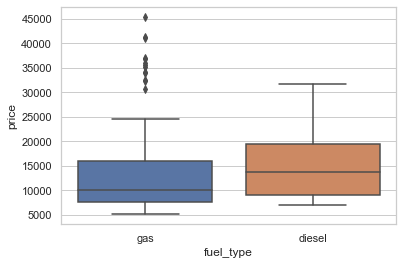

In [96]:
# Relação entre o tipo de combustível e o preço
sns.boxplot(x='fuel_type', y='price', data=df)
plt.show()

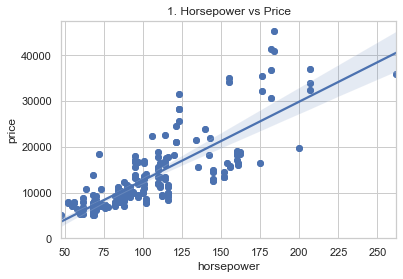

In [97]:
x = df['horsepower']
y = df['price']

plt.scatter(x, y)

sns.regplot(x='horsepower', y='price', data=df)
plt.title('1. Horsepower vs Price')
plt.ylim(0)
plt.show()

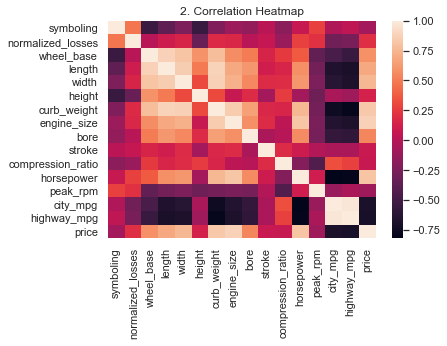

In [98]:
sns.heatmap(df.corr(), annot=False)
plt.title('2. Correlation Heatmap')
plt.show()

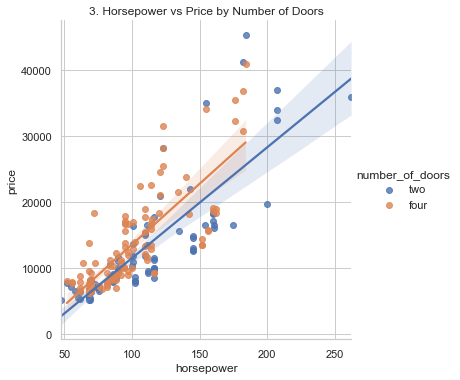

In [99]:
g = sns.lmplot(
    data=df,
    x='horsepower', y='price', hue='number_of_doors',
    height=5
)

g.set(xlabel='horsepower', ylabel='price', title='3. Horsepower vs Price by Number of Doors')

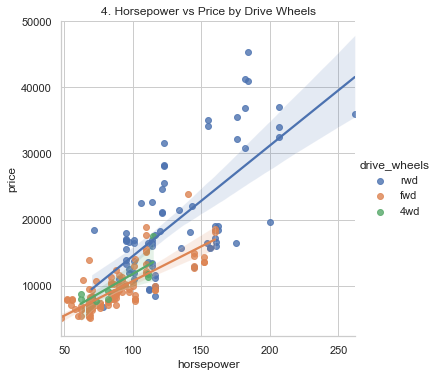

In [100]:
g = sns.lmplot(
    data=df,
    x='horsepower', y='price', hue='drive_wheels',
    height=5
)

g.set(xlabel='horsepower', ylabel='price', title='4. Horsepower vs Price by Drive Wheels')

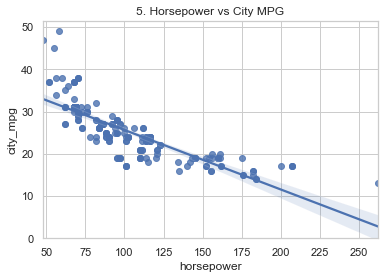

In [101]:
sns.regplot(x='horsepower', y='city_mpg', data=df)
plt.title('5. Horsepower vs City MPG')
plt.ylim(0)
plt.show()

**Pergunta:** Cite um exemplo de pelo menos os 3 cenários propostos que corroboram a leitura dos dados apresentados, justique sua resposta.

## 📝Resposta

### 1. Horsepower vs Price
- O preço médio dos veículos a diesel tende a ser maior que o preço médio dos veículos a gasolina. Porém, os veículos de maior valor são majoritariamente a gasolina.
### 2. Correlation Heatmap
- Existe uma forte correlação entre o comprimento e a largura dos veículos, já que em geral seguem a mesma proporção.
### 3. Horsepower vs Price by Number of Doors
- A quantidade de portas não impacta diretamente no preço.
### 4. Horsepower vs Price by Drive Wheels
- Carros que tem maior preço e potência são em sua maioria de tração traseira
### 5. Horsepower vs City MPG
- O rendimento de um veículo em milhas por galão em ambiente urbano é inversamente proporcional a sua potência, ou seja, um veículo mais potente tem um rendimento menor. Essa afirmação também se aplica no rendimento de veículos em rodovias.

## 2. Preparação dos Dados

### Análise de valores inválidos

Faça a análise de dados ausente, dados nulos e dados iguais a 0(zero). **Lembre-se:** Trate esses dados dentro do contexto de análise e justifique suas escolhas.
 

**Resposta:**

In [102]:
# filter only object from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            201 non-null    int64  
 1   normalized_losses    201 non-null    int64  
 2   make                 201 non-null    object 
 3   fuel_type            201 non-null    object 
 4   aspiration           201 non-null    object 
 5   number_of_doors      201 non-null    object 
 6   body_style           201 non-null    object 
 7   drive_wheels         201 non-null    object 
 8   engine_location      201 non-null    object 
 9   wheel_base           201 non-null    float64
 10  length               201 non-null    float64
 11  width                201 non-null    float64
 12  height               201 non-null    float64
 13  curb_weight          201 non-null    int64  
 14  engine_type          201 non-null    object 
 15  number_of_cylinders  201 non-null    obj

In [103]:
#Seu Código aqui...
df.isnull().sum()

symboling              0
normalized_losses      0
make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
number_of_cylinders    0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               0
city_mpg               0
highway_mpg            0
price                  0
dtype: int64

## 📝Resposta
- Não há valores nulos ou ausentes em nenhum dos atributos. A coluna symboling apresenta valores "0" (zero) pois seu intervalo intervalo varia de -3 a 3, expressando o grau de risco de seguro do veículo, o que é um dado válido.

### __(BONUS: 1 ponto extra.)__ Análise de Outliers

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

## 📝Resposta

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (removidos ou mantidos)? 

**Resposta:**

### Tratamento de dados Paramétricos

Faça o tratamento dos atributos não numéricos. Descubra quais são os atributos não numéricos, faça a análise dos valores desses atributos e manipule de forma conveniente para ser interpretado como um dado numérico. 

In [104]:
import category_encoders as ce

def clean_numeric_data(df):
    encoder = ce.OneHotEncoder(cols=["fuel_type", "aspiration", "number_of_doors", "body_style",
                                    "drive_wheels", "engine_location", "engine_type", "number_of_cylinders", "fuel_system", "make"])

    df_cleaned = encoder.fit_transform(df)

    return df_cleaned

df_cleaned = clean_numeric_data(df)
df_cleaned.head()

,symboling,normalized_losses,make_1,make_2,make_3,make_4,make_5,make_6,make_7,make_8,make_9,make_10,make_11,make_12,make_13,make_14,make_15,make_16,make_17,make_18,make_19,make_20,make_21,make_22,fuel_type_1,fuel_type_2,aspiration_1,aspiration_2,number_of_doors_1,number_of_doors_2,body_style_1,body_style_2,body_style_3,body_style_4,body_style_5,drive_wheels_1,drive_wheels_2,drive_wheels_3,engine_location_1,engine_location_2,wheel_base,length,width,height,curb_weight,engine_type_1,engine_type_2,engine_type_3,engine_type_4,engine_type_5,engine_type_6,number_of_cylinders_1,number_of_cylinders_2,number_of_cylinders_3,number_of_cylinders_4,number_of_cylinders_5,number_of_cylinders_6,number_of_cylinders_7,engine_size,fuel_system_1,fuel_system_2,fuel_system_3,fuel_system_4,fuel_system_5,fuel_system_6,fuel_system_7,fuel_system_8,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,88.6,168.8,64.1,48.8,2548,1,0,0,0,0,0,1,0,0,0,0,0,0,130,1,0,0,0,0,0,0,0,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,88.6,168.8,64.1,48.8,2548,1,0,0,0,0,0,1,0,0,0,0,0,0,130,1,0,0,0,0,0,0,0,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,94.5,171.2,65.5,52.4,2823,0,1,0,0,0,0,0,1,0,0,0,0,0,152,1,0,0,0,0,0,0,0,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,99.8,176.6,66.2,54.3,2337,0,0,1,0,0,0,1,0,0,0,0,0,0,109,1,0,0,0,0,0,0,0,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,99.4,176.6,66.4,54.3,2824,0,0,1,0,0,0,0,0,1,0,0,0,0,136,1,0,0,0,0,0,0,0,3.19,3.40,8.0,115,5500,18,22,17450


In [105]:
y = df_cleaned['price']
X = df_cleaned.drop(['price'], axis=1)

In [106]:
from sklearn.preprocessing import MinMaxScaler
#Separar os dados em treino e teste
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(X)

X = pd.DataFrame(scaled_data, columns=df_cleaned.columns[:-1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 74), (41, 74), (160,), (41,))

In [107]:
def gaussian_nb():
    from sklearn.naive_bayes import GaussianNB

    gnb = GaussianNB()

    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    return y_pred

print(gaussian_nb())

[ 7799 20970  6529  7738 15040  5572 45400 11248 16558 32250 25552 13845
 11549  6189  8495  7995 10595  7738  8189 40960 32528 30760  7198  6849
 25552 18344  9279 25552 32528  7957 16925  5572 13645  6189  8778 16630
  5118  7775  8449  9959 14869]


In [108]:
def linear_regression():
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    
    y_pred = reg.predict(X_test)
    
    print('Coefficients: \n', reg.coef_)
    print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
    print('R2 score: %.2f' % r2_score(y_test, y_pred))
    
    return reg

linear_regression()

Coefficients: 
 [-4.50730098e+02 -8.40199404e+02 -4.57140216e+15 -4.57140216e+15
 -4.57140216e+15 -4.57140216e+15 -4.57140216e+15 -4.57140216e+15
 -4.57140216e+15 -4.57140216e+15 -4.57140216e+15 -4.57140216e+15
 -4.57140216e+15 -4.57140216e+15 -4.57140216e+15  7.15614170e+15
 -4.57140216e+15 -4.57140216e+15 -4.57140216e+15 -4.57140216e+15
  2.22264459e+16 -4.57140216e+15 -4.57140216e+15 -4.57140216e+15
 -1.26942734e+16 -3.92516087e+15 -2.70653119e+16 -2.70653119e+16
  3.55747144e+16  3.55747144e+16 -8.52739950e+15 -8.52739950e+15
 -8.52739950e+15 -8.52739950e+15 -8.52739950e+15 -9.60940309e+15
 -9.60940309e+15 -9.60940309e+15 -1.31152561e+16  1.36825919e+16
  6.92512500e+03 -7.54600000e+03  5.93000000e+03 -3.18800000e+03
  1.72460000e+04 -1.00722912e+16 -1.00722912e+16 -1.00722912e+16
 -2.17998351e+16 -5.00185640e+15 -3.68701392e+16 -4.41660677e+15
 -4.41660677e+15 -4.41660677e+15  7.31093710e+15 -4.41660677e+15
 -3.12043724e+15 -4.41660677e+15  6.76300000e+03  1.30243660e+15
  1.30243

LinearRegression()

<AxesSubplot:>

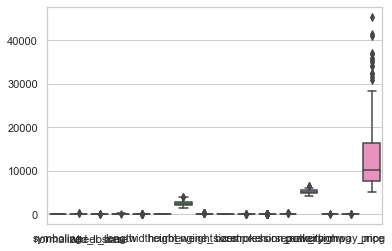

In [109]:
sns.set(style="whitegrid", color_codes=True)
sns.boxplot( data=df)

**Pergunta:** Quais são os atributos não numéricos? Qual o método de análise adotado? Por que esse essa escolha? 

## 📝Resposta

Utilizando o código:

In [110]:
df_obj = df.select_dtypes(exclude=['int64', 'float64'])
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   make                 201 non-null    object
 1   fuel_type            201 non-null    object
 2   aspiration           201 non-null    object
 3   number_of_doors      201 non-null    object
 4   body_style           201 non-null    object
 5   drive_wheels         201 non-null    object
 6   engine_location      201 non-null    object
 7   engine_type          201 non-null    object
 8   number_of_cylinders  201 non-null    object
 9   fuel_system          201 non-null    object
dtypes: object(10)
memory usage: 15.8+ KB


Os atributos não numéricos são:

- make
- fuel_type
- aspiration
- number_of_doors
- body_style
- drive_wheels
- engine_location
- engine_type
- number_of_cylinders
- fuel_system

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para a determinação do preço de carro? Por que ? 

## 📝Resposta

    [ ] Aprendizado por reforço
    [x] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

**Pergunta:** Qual a técnica sugerida para este projeto?

## 📝Resposta

    [x] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 3 modelos de algoritmos para testar a performance de cada um deles.

## 📝Resposta

1. Random Forest Regressor
2. Linear Regression 
3. Decision Tree Regressor {{Perguntar se esse está correto}}
3. {{Tirar dúvida com o professor}}

**Pergunta:** Explique como cada algoritmo funciona.



## 📝Resposta

1. Random Forest Regressor 
-
2. Linear Regression
-
3. Decision Tree Regressor
- As árvores de decisão são usadas para ajustar uma curva senoidal com observação adicional de ruído. Como resultado, ele aprende regressões lineares locais que se aproximam da curva seno.

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo.

In [111]:
#Seu Código aqui...
X = df_cleaned.drop(['price'], axis=1)
Y = df_cleaned['price']

Divida o subset em conjunto de treinamento e teste.

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## 4. Treinamento e teste do modelo

Faça o treinamento e teste de dos 3 algoritmos escolhidos. Para cada um dos modelos utilize uma das métricas: R2-score, RMSE e MAE para avaliar a performance dos medelos. Utilize a média do obtido da validação cruzada para um kfold de 5.

### Algoritmo 1

In [113]:
from sklearn.ensemble import RandomForestRegressor

randomForestRegressor = RandomForestRegressor()
randomForestRegressor.fit(X_train, y_train)

predict = randomForestRegressor.predict(X_test)
print("R2-score: ", r2_score(y_test, predict))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predict)))
print('MAE: ', mean_absolute_error(y_test, predict))

scores = cross_val_score(randomForestRegressor, X, Y,
                         cv=crossvalidation, scoring='r2')
print("R2-score médio com KFold: ", scores.mean())


R2-score:  0.8964975695357155
RMSE:  2266.570326277225
MAE:  1482.6135807962532
R2-score médio com KFold:  0.9231189552650927


### Algoritmo 2

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=7)

linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)

predict = linearRegression.predict(X_test)
print("R2-score: ", r2_score(y_test, predict))
print('MAE: ', mean_absolute_error(y_test, predict))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predict)))

scores = cross_val_score(linearRegression, X, y,
                         cv=crossvalidation, scoring='r2')
print("R2-score médio com KFold: ", scores.mean())


R2-score:  0.8701131808376099
MAE:  2003.388581772015
RMSE:  2539.080472075106
R2-score médio com KFold:  0.8794613157151125


### Algoritmo 3

In [115]:
from sklearn.ensemble import GradientBoostingRegressor

gradientBoostingRegressor = GradientBoostingRegressor()
gradientBoostingRegressor.fit(X_train, y_train)

predict = gradientBoostingRegressor.predict(X_test)
print("R2-score: ", r2_score(y_test, predict))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predict)))
print('MAE: ', mean_absolute_error(y_test, predict))

scores = cross_val_score(gradientBoostingRegressor, X, Y,
                         cv=crossvalidation, scoring='r2')
print("R2-score médio com KFold: ", scores.mean())


R2-score:  0.8720043113195232
RMSE:  2520.5284010360856
MAE:  1611.2082265021884
R2-score médio com KFold:  0.9228496608823976


In [116]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

predict = ridge.predict(X_test)
print("R2-score: ", r2_score(y_test, predict))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predict)))
print('MAE: ', mean_absolute_error(y_test, predict))

scores = cross_val_score(ridge, X, Y,
                         cv=crossvalidation, scoring='r2')
print("R2-score médio com KFold: ", scores.mean())


R2-score:  0.911444401495142
RMSE:  2096.5341260710143
MAE:  1678.188908429422
R2-score médio com KFold:  0.9187794845554063


In [117]:
df_obj = df.select_dtypes(exclude=['int64', 'float64'])
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   make                 201 non-null    object
 1   fuel_type            201 non-null    object
 2   aspiration           201 non-null    object
 3   number_of_doors      201 non-null    object
 4   body_style           201 non-null    object
 5   drive_wheels         201 non-null    object
 6   engine_location      201 non-null    object
 7   engine_type          201 non-null    object
 8   number_of_cylinders  201 non-null    object
 9   fuel_system          201 non-null    object
dtypes: object(10)
memory usage: 15.8+ KB


**Pergunta:** Qual foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

## 📝Resposta

## 5. Validação e Otimização do Modelo

Faça a otimização dos modelos, tunning dos hiperparametros, utilize técinicas como **RandomSearchCV** ou **GridSearchCV**.

**Pergunta:** Qual a técnica escolhida? Por que?

## 📝Resposta

Segundo a documentação das duas técnicas utilizadas, a RandomSearchCV é uma técnica de busca aleatória, que utiliza um conjunto de parâmetros aleatórios para ajustar o modelo. A GridSearchCV é uma técnica de busca em grade, que utiliza um conjunto de parâmetros fixos para ajustar o modelo. Para o nosso caso pela quantidade de parâmetros foi escolhido o RandomSearchCV, pois ele realiza um menor número de iterações, e aumenta as chances de encontrar os parâmetros ideias para o modelo com menor uso de poder computacional.

In [118]:
randomForestRegressor.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

### Algoritmo 1

In [119]:

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grid = {}

randomSearchCv = RandomizedSearchCV(
    estimator=randomForestRegressor, param_distributions=param_grid, cv=crossvalidation, scoring='r2', n_iter=10)
randomSearchCv.fit(X, Y)

print('Melhor estimador: ', randomSearchCv.best_estimator_)
print('Melhor score: ', randomSearchCv.best_score_)

C:\Users\jjean\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Melhor estimador:  RandomForestRegressor()
Melhor score:  0.9215829420954351


### Algoritmo 2

In [120]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grid = {}

randomSearchCv = RandomizedSearchCV(
    estimator=linearRegression, param_distributions=param_grid, cv=crossvalidation, scoring='r2', n_iter=10)
randomSearchCv.fit(X, Y)

print('Melhor estimador: ', randomSearchCv.best_estimator_)
print('Melhor score: ', randomSearchCv.best_score_)

Melhor estimador:  LinearRegression()
Melhor score:  0.8794613157151125


C:\Users\jjean\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


### Algoritmo 3

In [121]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grid = {}

randomSearchCv = RandomizedSearchCV(
    estimator=ridge, param_distributions=param_grid, cv=crossvalidation, scoring='r2', n_iter=10)
randomSearchCv.fit(X, Y)

print('Melhor estimador: ', randomSearchCv.best_estimator_)
print('Melhor score: ', randomSearchCv.best_score_)

C:\Users\jjean\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Melhor estimador:  Ridge()
Melhor score:  0.9187794845554063


Sumarize na tabela abaixo os indicadores para cada um dos preditores e suas respectivas pontuações para os conjuntos de dados de treino e de testes

**Resposta:**

|                      | RandomForestRegressor |     LinearRegressio  |    Ridge   |
|:---------------------|:---------------------:|:--------------------:|:----------:|
| treino |      X      |      X                |       X              |
| teste  |      X      |      X                |       X              |


**Pergunta:** Qual dos algoritmos obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:**

### __(BONUS: 1 ponto extra.)__ Implementação do algoritmo otimizado

Configure o modelo selecionado com os parâmetros otimizados obtidos anteriormente.

In [122]:
#Seu Código aqui...



### Modelo de produção: Teste com novos dados

Utilize 3 exemplos criados por você mesmo para obter um valor de venda de veículo. Defina o teste para um resultado baixo, médio e alto do preço do carro.

In [123]:
#Seu Código aqui...



**Pergunta:** Qual foi o resultado obtido? O resultado está coerente com o esperado?

**Resposta:**

## 6. Conclusões finais

Ufa!!... Chegamos ao final deste projeto. Parabéns! De forma simplificada e completa passamos por todas as etapas de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.

**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

## 📝Resposta

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**:

**Pergunta:**: As etapas de desenvolvimento se aplicam para um problema de classificação? Justifique:

**Resposta**:

## Referências

- [https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html](https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html)
- [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)